# 机器学习 - 线性回归

ex1data1.txt文件中第一列为一个城市的人口，第二列是该城市一辆快餐车的利润

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


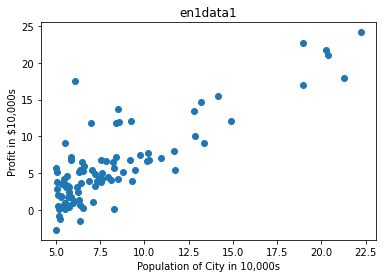

In [67]:
# Plotting the data
x = []
y = []
with open('ex1data1.txt', 'r', encoding='utf-8') as data1:
    for i in data1:
        x.append([float(i.split(',')[0])])
        y.append([float(i.split(',')[1])])
x = np.array(x)
y = np.array(y)
x_label = 'Population of City in 10,000s'
y_label = 'Profit in $10,000s'
plt.scatter(x, y)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('en1data1')
plt.show()

In [68]:
# Computing the cost J(θ)
def computeCost(X, y, theta):
    return np.sum(np.power((X.dot(theta)-y), 2))/(2*len(y))


iterations = 1500  # 迭代次数
alpha = 0.01    # 学习率
X = np.column_stack((np.ones((len(x), 1)), x))    # 在x前添加一列x_0，值全为1
theta = np.zeros((2, 1))  # 初始化theta
computeCost(X, y, theta)

32.072733877455676

In [69]:
# Gradient Descent
def gradientDescent(X, y, theta, alpha, iterations):
    temp = np.zeros((2, 1))
    cost = np.zeros(iterations)
    for i in range(iterations):
        value = X.dot(theta)-y
        for j in range(len(theta)):
            temp[j] = theta[j]-(alpha/len(X)) * \
                np.sum(np.multiply(value, X[:, j:j+1]))
        theta = temp
        # print(i, ' ', theta)
        cost[i] = computeCost(X, y, theta)
    return cost, theta


cost, new_theta = gradientDescent(X, y, theta, alpha, iterations)
print(new_theta)
print(computeCost(X, y, new_theta))

# test case
predict1 = np.dot(np.array([[1,3.5]]),new_theta)
predict2 = np.dot(np.array([[1,7]]),new_theta)
print(f"predict1: test case: [1, 3.5] prediction: {np.sum(predict1)}")
print(f"predict2: test case: [1, 7] prediction: {np.sum(predict2)}")

[[-3.63029144]
 [ 1.16636235]]
4.483388256587726
predict1: test case: [1, 3.5] prediction: 0.45197678677017716
predict2: test case: [1, 7] prediction: 4.534245012944714


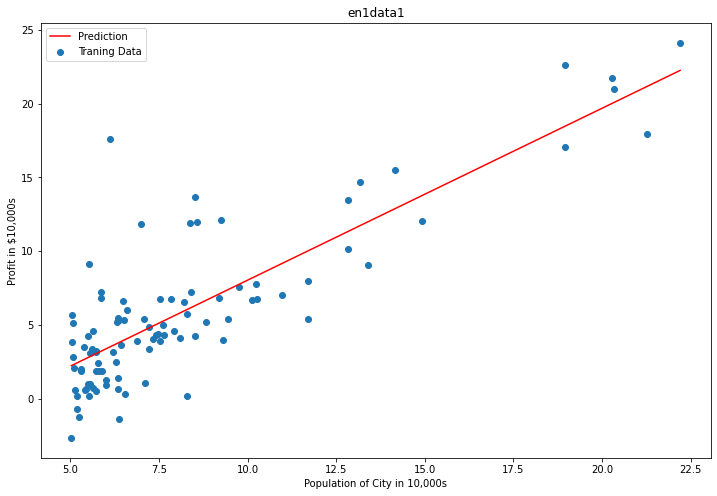

In [83]:
# Plotting the data
plt.figure(figsize=(12,8))
x_label = 'Population of City in 10,000s'
y_label = 'Profit in $10,000s'
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.scatter(x, y,label='Traning Data')
x_2 = np.linspace(x.min(),x.max(),100)
f = new_theta[0]+new_theta[1]*x_2
plt.plot(x_2, f,c = 'red',label='Prediction')
plt.legend(loc=2)
plt.title('en1data1')
plt.show()

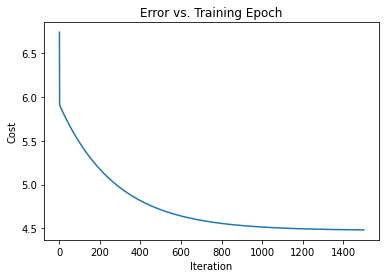

In [76]:
# Visualizing J(θ)
iter = np.linspace(1,iterations,1500)
plt.plot(iter,cost)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Error vs. Training Epoch')
plt.show()

en1data2.txt文件包含了房价的数据集，第一列是房子的面积，第二列是卧室的数量，第三列是房子的价格